In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Importing the Datasets

### 10-year Government Yield

In [2]:
df_Govt_Yield_10Y = pd.read_excel("10Y/Government-Yields_Data_10Y.xlsx")

In [3]:
actual_colnames_Govt_Yield_10Y = {'C08210Y Index  (R3)':'USD',
                                 'C91010Y Index  (L3)':'EUR',
                                 'C11010Y Index  (R2)':'GBP',
                                 'C25610Y Index  (L1)':'CHF',
                                 'C10510Y Index  (R1)':'JPY',
                                 'C12710Y Index  (L4)':'AUD',
                                 'C10110Y Index  (L2)':'CAD',
                                 'C25010Y Index  (R1)':'NZD',
                                 'C25910Y Index  (R4)':'SEK',
                                 'C2669Y Index  (R1)':'NOK',
                                 'C26710Y Index  (R1)':'DKK'
                  }

df_Govt_Yield_10Y.rename(columns=actual_colnames_Govt_Yield_10Y, inplace=True)
df_Govt_Yield_10Y

,Date,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD,NOK,SEK,DKK
0,2000-01-03,6.6100,5.4700,NaN,NaN,NaN,NaN,NaN,NaN,6.2200,5.9100,5.7800
1,2000-01-04,6.5000,5.4900,5.7000,3.6600,1.8800,7.1400,6.4300,NaN,6.2700,5.9500,5.7900
2,2000-01-05,6.6100,5.5100,5.7900,3.6600,1.8700,7.0500,6.5100,7.3600,6.2700,5.9500,5.8000
3,2000-01-06,6.5400,5.5400,5.7600,3.7000,1.8400,7.1300,6.4600,7.4500,6.3100,NaN,5.8600
4,2000-01-07,6.5300,5.4400,5.7000,3.6700,1.8800,7.1200,6.4500,7.4300,6.2700,5.9200,5.8000
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5634,0.5914,1.6446,0.6171,0.2178,2.8617,2.5313,3.2684,2.6509,1.2163,0.8887
5807,2022-04-06,2.6093,0.6240,1.7008,0.6694,0.2409,2.9336,2.5514,3.4267,2.7323,1.3358,0.9179
5808,2022-04-07,2.6522,0.6656,1.7104,0.7015,0.2298,2.9157,2.5876,3.4294,2.7609,1.3737,0.9532
5809,2022-04-08,2.7164,0.6816,1.7363,0.7068,0.2259,2.9689,2.6446,3.4533,2.7563,1.4125,0.9681


In [4]:
df_Govt_Yield_10Y = df_Govt_Yield_10Y.bfill(axis=0).ffill(axis=0)
df_Govt_Yield_10Y

,Date,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD,NOK,SEK,DKK
0,2000-01-03,6.6100,5.4700,5.7000,3.6600,1.8800,7.1400,6.4300,7.3600,6.2200,5.9100,5.7800
1,2000-01-04,6.5000,5.4900,5.7000,3.6600,1.8800,7.1400,6.4300,7.3600,6.2700,5.9500,5.7900
2,2000-01-05,6.6100,5.5100,5.7900,3.6600,1.8700,7.0500,6.5100,7.3600,6.2700,5.9500,5.8000
3,2000-01-06,6.5400,5.5400,5.7600,3.7000,1.8400,7.1300,6.4600,7.4500,6.3100,5.9200,5.8600
4,2000-01-07,6.5300,5.4400,5.7000,3.6700,1.8800,7.1200,6.4500,7.4300,6.2700,5.9200,5.8000
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5634,0.5914,1.6446,0.6171,0.2178,2.8617,2.5313,3.2684,2.6509,1.2163,0.8887
5807,2022-04-06,2.6093,0.6240,1.7008,0.6694,0.2409,2.9336,2.5514,3.4267,2.7323,1.3358,0.9179
5808,2022-04-07,2.6522,0.6656,1.7104,0.7015,0.2298,2.9157,2.5876,3.4294,2.7609,1.3737,0.9532
5809,2022-04-08,2.7164,0.6816,1.7363,0.7068,0.2259,2.9689,2.6446,3.4533,2.7563,1.4125,0.9681


### Interest Rate Swaps

In [5]:
df_Int_Rate_Swap_10Y = pd.read_excel("10Y/IRS_Data_10Y.xlsx")

In [6]:
actual_colnames_Int_Rate_Swap_10Y = {'USSW10 Curncy  (R1)':'IRS_USD',
                                    'EUSW10V3 Curncy  (L3)':'IRS_EUR_V3',
                                    'EUSA10 Curncy  (L4)':'IRS_EUR',
                                    'BPSW10V3 Curncy  (L2)':'IRS_GBP_V3',
                                    'BPSW10 Curncy  (R3)':'IRS_GBP',
                                    'SFSW10V3 Curncy  (L1)':'IRS_CHF_V3',
                                    'SFSW10 Curncy  (R2)':'IRS_CHF',
                                    'JYSW10 Curncy  (R1)':'IRS_JPY',
                                    'JYBC10 Curncy  (R1)':'IRS_JPY_BC',
                                    'ADSWAP10 Curncy  (R1)':'IRS_AUD',
                                    'CDSW10 Curncy  (R4)':'IRS_CAD',
                                    'NDSWAP10 Curncy  (R1)':'IRS_NZD',
                                    'NKSW10 Curncy  (R1)':'IRS_NOK',
                                    'NKBFVC10 Curncy  (R1)':'IRS_NOK_BFVC',
                                    'SKSW10 Curncy  (R1)':'IRS_SEK',
                                    'DKSW10 Curncy  (R1)':'IRS_DKK'
                                   }

df_Int_Rate_Swap_10Y.rename(columns=actual_colnames_Int_Rate_Swap_10Y, inplace=True)
df_Int_Rate_Swap_10Y

,Date,IRS_USD,IRS_EUR_V3,IRS_EUR,IRS_GBP_V3,IRS_GBP,IRS_CHF_V3,IRS_CHF,IRS_JPY,IRS_JPY_BC,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_NOK_BFVC,IRS_SEK,IRS_DKK
0,2000-01-03,7.3600,NaN,5.855,NaN,NaN,NaN,NaN,2.0200,NaN,7.6400,6.6850,NaN,6.8450,NaN,6.460,6.2200
1,2000-01-04,7.2850,NaN,5.865,NaN,NaN,NaN,NaN,2.1100,NaN,7.5500,6.7450,8.1350,6.9150,NaN,6.485,6.2150
2,2000-01-05,7.3700,NaN,5.855,NaN,NaN,NaN,NaN,2.0625,NaN,7.5800,6.7850,8.2600,6.8900,NaN,6.510,6.2100
3,2000-01-06,7.3200,NaN,5.915,NaN,NaN,NaN,NaN,2.0300,NaN,7.5600,6.7150,8.2500,6.9350,NaN,6.535,6.2700
4,2000-01-07,7.2700,NaN,5.895,NaN,NaN,NaN,NaN,2.0850,NaN,7.5900,6.6950,8.2900,6.9150,NaN,6.485,6.2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5918,1.2380,1.274,NaN,NaN,NaN,NaN,0.3633,NaN,3.1975,2.9991,3.5575,2.8167,7.5,1.953,1.5385
5807,2022-04-06,2.6428,1.2880,1.318,NaN,NaN,NaN,NaN,0.4036,NaN,3.2125,2.9990,3.6050,2.8884,7.5,2.030,1.5705
5808,2022-04-07,2.6971,1.3108,1.344,NaN,NaN,NaN,NaN,0.3961,NaN,3.2675,3.0517,3.6250,2.9050,7.5,2.050,1.5916
5809,2022-04-08,2.7580,1.3648,1.397,NaN,NaN,NaN,NaN,0.4049,NaN,3.2830,3.1120,3.6700,2.9150,7.5,2.090,1.6435


In [7]:
df_Int_Rate_Swap_10Y['IRS_EUR'] = df_Int_Rate_Swap_10Y[['IRS_EUR_V3','IRS_EUR']].mean(axis=1)
df_Int_Rate_Swap_10Y['IRS_GBP'] = df_Int_Rate_Swap_10Y[['IRS_GBP_V3','IRS_GBP']].mean(axis=1)
df_Int_Rate_Swap_10Y['IRS_CHF'] = df_Int_Rate_Swap_10Y[['IRS_CHF_V3','IRS_CHF']].mean(axis=1)
# df_Int_Rate_Swap_10Y['IRS_JPY'] = df_Int_Rate_Swap_10Y[['IRS_JPY_BC','IRS_JPY']].mean(axis=1)
# df_Int_Rate_Swap_10Y['IRS_NOK'] = df_Int_Rate_Swap_10Y[['IRS_NOK_BFVC','IRS_NOK']].mean(axis=1)

df_Int_Rate_Swap_10Y.drop(['IRS_EUR_V3','IRS_GBP_V3','IRS_CHF_V3','IRS_JPY_BC','IRS_NOK_BFVC'], axis=1, inplace=True)
df_Int_Rate_Swap_10Y

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_SEK,IRS_DKK
0,2000-01-03,7.3600,5.8550,NaN,NaN,2.0200,7.6400,6.6850,NaN,6.8450,6.460,6.2200
1,2000-01-04,7.2850,5.8650,NaN,NaN,2.1100,7.5500,6.7450,8.1350,6.9150,6.485,6.2150
2,2000-01-05,7.3700,5.8550,NaN,NaN,2.0625,7.5800,6.7850,8.2600,6.8900,6.510,6.2100
3,2000-01-06,7.3200,5.9150,NaN,NaN,2.0300,7.5600,6.7150,8.2500,6.9350,6.535,6.2700
4,2000-01-07,7.2700,5.8950,NaN,NaN,2.0850,7.5900,6.6950,8.2900,6.9150,6.485,6.2100
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5918,1.2560,NaN,NaN,0.3633,3.1975,2.9991,3.5575,2.8167,1.953,1.5385
5807,2022-04-06,2.6428,1.3030,NaN,NaN,0.4036,3.2125,2.9990,3.6050,2.8884,2.030,1.5705
5808,2022-04-07,2.6971,1.3274,NaN,NaN,0.3961,3.2675,3.0517,3.6250,2.9050,2.050,1.5916
5809,2022-04-08,2.7580,1.3809,NaN,NaN,0.4049,3.2830,3.1120,3.6700,2.9150,2.090,1.6435


In [8]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_Int_Rate_Swap_10Y = df_Int_Rate_Swap_10Y.bfill(axis='rows').ffill(axis='rows')
df_Int_Rate_Swap_10Y

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_SEK,IRS_DKK
0,2000-01-03,7.3600,5.8550,3.745000,2.4770,2.0200,7.6400,6.6850,8.1350,6.8450,6.460,6.2200
1,2000-01-04,7.2850,5.8650,3.745000,2.4770,2.1100,7.5500,6.7450,8.1350,6.9150,6.485,6.2150
2,2000-01-05,7.3700,5.8550,3.745000,2.4770,2.0625,7.5800,6.7850,8.2600,6.8900,6.510,6.2100
3,2000-01-06,7.3200,5.9150,3.745000,2.4770,2.0300,7.5600,6.7150,8.2500,6.9350,6.535,6.2700
4,2000-01-07,7.2700,5.8950,3.745000,2.4770,2.0850,7.5900,6.6950,8.2900,6.9150,6.485,6.2100
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5918,1.2560,1.134925,0.1675,0.3633,3.1975,2.9991,3.5575,2.8167,1.953,1.5385
5807,2022-04-06,2.6428,1.3030,1.134925,0.1675,0.4036,3.2125,2.9990,3.6050,2.8884,2.030,1.5705
5808,2022-04-07,2.6971,1.3274,1.134925,0.1675,0.3961,3.2675,3.0517,3.6250,2.9050,2.050,1.5916
5809,2022-04-08,2.7580,1.3809,1.134925,0.1675,0.4049,3.2830,3.1120,3.6700,2.9150,2.090,1.6435


### Basis Swaps

In [9]:
df_Basis_Swaps_10Y = pd.read_excel("10Y/Basis-Swaps_Data_10Y.xlsx")

In [10]:
actual_colnames_Basis_Swaps_10Y = {'EUBS10 Curncy  (R2)':'BS_EUR',
                                  'BPBS10 Curncy  (L1)':'BS_GBP',
                                  'SFBS10 Curncy  (L2)':'BS_CHF',
                                  'JYBS10 Curncy  (L3)':'BS_JPY',
                                  'ADBS10 Curncy  (R1)':'BS_AUD',
                                  'CDBS10 Curncy  (L4)':'BS_CAD',
                                  'NDBS10 Curncy  (R1)':'BS_NZD',
                                  'NKBS10 Curncy  (R1)':'BS_NOK',
                                  'SKBS10 Curncy  (R3)':'BS_SEK',
                                  'DKBS10 Curncy  (R4)':'BS_DKK'
                                 }

df_Basis_Swaps_10Y.rename(columns=actual_colnames_Basis_Swaps_10Y, inplace=True)
df_Basis_Swaps_10Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,NaN,NaN,NaN,NaN,6.500,NaN,NaN,-3.00,NaN,NaN
4,2000-01-07,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5799,2022-04-05,NaN,NaN,NaN,NaN,38.500,-5.75,41.750,-3.75,4.500,NaN
5800,2022-04-06,NaN,NaN,NaN,NaN,38.875,-5.75,41.875,-4.00,4.500,NaN
5801,2022-04-07,NaN,NaN,NaN,NaN,38.875,-5.75,42.125,-4.25,4.375,NaN
5802,2022-04-08,NaN,NaN,NaN,NaN,38.880,-5.75,43.500,-5.25,2.750,NaN


In [11]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_Basis_Swaps_10Y = df_Basis_Swaps_10Y.bfill(axis='rows').ffill(axis='rows')
df_Basis_Swaps_10Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,-6.8385,1.6465,-26.1474,-37.3,6.500,8.00,9.000,-3.00,-4.000,-21.5471
1,2000-01-04,-6.8385,1.6465,-26.1474,-37.3,6.500,8.00,9.000,-3.00,-4.000,-21.5471
2,2000-01-05,-6.8385,1.6465,-26.1474,-37.3,6.500,8.00,9.000,-3.00,-4.000,-21.5471
3,2000-01-06,-6.8385,1.6465,-26.1474,-37.3,6.500,8.00,9.000,-3.00,-4.000,-21.5471
4,2000-01-07,-6.8385,1.6465,-26.1474,-37.3,6.500,8.00,9.000,-2.00,-4.000,-21.5471
...,...,...,...,...,...,...,...,...,...,...,...
5799,2022-04-05,-10.1250,0.6250,-18.2500,-33.0,38.500,-5.75,41.750,-3.75,4.500,-34.8500
5800,2022-04-06,-10.1250,0.6250,-18.2500,-33.0,38.875,-5.75,41.875,-4.00,4.500,-34.8500
5801,2022-04-07,-10.1250,0.6250,-18.2500,-33.0,38.875,-5.75,42.125,-4.25,4.375,-34.8500
5802,2022-04-08,-10.1250,0.6250,-18.2500,-33.0,38.880,-5.75,43.500,-5.25,2.750,-34.8500


In [12]:
#Converting the Basis Swap value into percentage terms from basis terms by dividing it by 100

df_Basis_Swaps_10Y = (df_Basis_Swaps_10Y.set_index('Date')/100).reset_index()
df_Basis_Swaps_10Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
1,2000-01-04,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
2,2000-01-05,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
3,2000-01-06,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
4,2000-01-07,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0200,-0.04000,-0.215471
...,...,...,...,...,...,...,...,...,...,...,...
5799,2022-04-05,-0.101250,0.006250,-0.182500,-0.330,0.38500,-0.0575,0.41750,-0.0375,0.04500,-0.348500
5800,2022-04-06,-0.101250,0.006250,-0.182500,-0.330,0.38875,-0.0575,0.41875,-0.0400,0.04500,-0.348500
5801,2022-04-07,-0.101250,0.006250,-0.182500,-0.330,0.38875,-0.0575,0.42125,-0.0425,0.04375,-0.348500
5802,2022-04-08,-0.101250,0.006250,-0.182500,-0.330,0.38880,-0.0575,0.43500,-0.0525,0.02750,-0.348500


### Nominal Yield
- the currency-specific nominal yields of our 10 countries sample at the five-year horizon

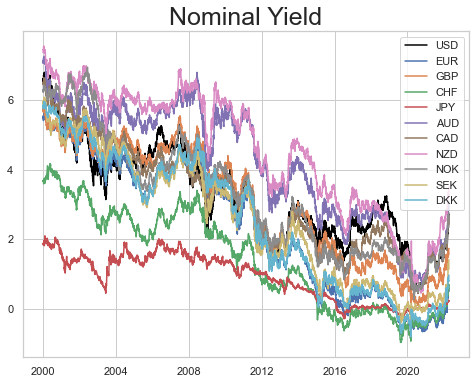

In [13]:
#Plotting Nominal Yields (Fig-1a)

plt.figure(figsize=(8,6))

for each_curr in df_Govt_Yield_10Y.iloc[:,1:]:
    if each_curr == 'USD':
        plt.plot(df_Govt_Yield_10Y['Date'], df_Govt_Yield_10Y[each_curr], label=each_curr, color='black')
    else:
        plt.plot(df_Govt_Yield_10Y['Date'], df_Govt_Yield_10Y[each_curr], label=each_curr)

plt.title("Nominal Yield", fontsize=25)
plt.legend()
plt.show()

# Computations & Analysis

### Market-implied Forward Premium (MiFP)
- For longer term maturity(>=1), we calculate as follows:

MiFP(i,n,t) = IRS(i,n,t) + BS(i,n,t) − IRS(USD,n,t)

In [14]:
# First merge the IRS and BS data based on Date

df_MiFP = df_Int_Rate_Swap_10Y.merge(df_Basis_Swaps_10Y, left_on='Date', right_on='Date', how='outer')

In [15]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_MiFP = df_MiFP.bfill(axis='rows').ffill(axis='rows')
df_MiFP

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,...,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,7.3600,5.8550,3.745000,2.4770,2.0200,7.6400,6.6850,8.1350,6.8450,...,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
1,2000-01-04,7.2850,5.8650,3.745000,2.4770,2.1100,7.5500,6.7450,8.1350,6.9150,...,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
2,2000-01-05,7.3700,5.8550,3.745000,2.4770,2.0625,7.5800,6.7850,8.2600,6.8900,...,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
3,2000-01-06,7.3200,5.9150,3.745000,2.4770,2.0300,7.5600,6.7150,8.2500,6.9350,...,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0300,-0.04000,-0.215471
4,2000-01-07,7.2700,5.8950,3.745000,2.4770,2.0850,7.5900,6.6950,8.2900,6.9150,...,-0.068385,0.016465,-0.261474,-0.373,0.06500,0.0800,0.09000,-0.0200,-0.04000,-0.215471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5918,1.2560,1.134925,0.1675,0.3633,3.1975,2.9991,3.5575,2.8167,...,-0.101250,0.006250,-0.182500,-0.330,0.38500,-0.0575,0.41750,-0.0375,0.04500,-0.348500
5807,2022-04-06,2.6428,1.3030,1.134925,0.1675,0.4036,3.2125,2.9990,3.6050,2.8884,...,-0.101250,0.006250,-0.182500,-0.330,0.38875,-0.0575,0.41875,-0.0400,0.04500,-0.348500
5808,2022-04-07,2.6971,1.3274,1.134925,0.1675,0.3961,3.2675,3.0517,3.6250,2.9050,...,-0.101250,0.006250,-0.182500,-0.330,0.38875,-0.0575,0.42125,-0.0425,0.04375,-0.348500
5809,2022-04-08,2.7580,1.3809,1.134925,0.1675,0.4049,3.2830,3.1120,3.6700,2.9150,...,-0.101250,0.006250,-0.182500,-0.330,0.38880,-0.0575,0.43500,-0.0525,0.02750,-0.348500


In [16]:
# Now calculate MiFP based on the above formula

df_MiFP['MiFP_EUR'] = df_MiFP['IRS_EUR'] + df_MiFP['BS_EUR'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_GBP'] = df_MiFP['IRS_GBP'] + df_MiFP['BS_GBP'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_CHF'] = df_MiFP['IRS_CHF'] + df_MiFP['BS_CHF'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_JPY'] = df_MiFP['IRS_JPY'] + df_MiFP['BS_JPY'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_AUD'] = df_MiFP['IRS_AUD'] + df_MiFP['BS_AUD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_CAD'] = df_MiFP['IRS_CAD'] + df_MiFP['BS_CAD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_NZD'] = df_MiFP['IRS_NZD'] + df_MiFP['BS_NZD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_NOK'] = df_MiFP['IRS_NOK'] + df_MiFP['BS_NOK'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_DKK'] = df_MiFP['IRS_DKK'] + df_MiFP['BS_DKK'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_SEK'] = df_MiFP['IRS_SEK'] + df_MiFP['BS_SEK'] - df_MiFP['IRS_USD']

# Keeping the relevant columns

df_MiFP = df_MiFP[['Date','MiFP_EUR', 'MiFP_GBP', 'MiFP_CHF',
                   'MiFP_JPY', 'MiFP_AUD', 'MiFP_CAD',
                   'MiFP_NZD', 'MiFP_NOK', 'MiFP_DKK', 'MiFP_SEK'
                  ]]
df_MiFP

,Date,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2000-01-03,-1.573385,-3.598535,-5.144474,-5.7130,0.34500,-0.5950,0.86500,-0.5450,-1.355471,-0.94000
1,2000-01-04,-1.488385,-3.523535,-5.069474,-5.5480,0.33000,-0.4600,0.94000,-0.4000,-1.285471,-0.84000
2,2000-01-05,-1.583385,-3.608535,-5.154474,-5.6805,0.27500,-0.5050,0.98000,-0.5100,-1.375471,-0.90000
3,2000-01-06,-1.473385,-3.558535,-5.104474,-5.6630,0.30500,-0.5250,1.02000,-0.4150,-1.265471,-0.82500
4,2000-01-07,-1.443385,-3.508535,-5.054474,-5.5580,0.38500,-0.4950,1.11000,-0.3750,-1.275471,-0.82500
...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,-1.437050,-1.450625,-2.606800,-2.5585,0.99070,0.3498,1.38320,0.1874,-1.401800,-0.59380
5807,2022-04-06,-1.441050,-1.501625,-2.657800,-2.5692,0.95845,0.2987,1.38095,0.2056,-1.420800,-0.56780
5808,2022-04-07,-1.470950,-1.555925,-2.712100,-2.6310,0.95915,0.2971,1.34915,0.1654,-1.454000,-0.60335
5809,2022-04-08,-1.478350,-1.616825,-2.773000,-2.6831,0.91380,0.2965,1.34700,0.1045,-1.463000,-0.64050


### Swap-implied Dollar Yield (SiDY)
- Intuitively, since GovtYield(i,n,t) − MiFP(i,n,t) measures the synthetic dollar borrowing cost of swapping the cash flows of foreign currency Treasury bonds into U.S. dollars.
- At 5-year tenor, it can calculated as:

    SiDY(i,n,t=5) = GovtYield(i,n,t=5) − MiFP(i,n,t=5)


- It is immediately clear that these swap-implied dollar yields track the yield on U.S. Treasuries very closely, with significantly less dispersion than currency-specific yields.

In [17]:
# First merge the Government Yield and MiFP data based on Date

df_SiDY = df_Govt_Yield_10Y.merge(df_MiFP, left_on='Date', right_on='Date', how='outer')

In [18]:
# Now calculate SiDY based on the above formula

df_SiDY['SiDY_EUR'] = df_SiDY['EUR'] - df_SiDY['MiFP_EUR']
df_SiDY['SiDY_GBP'] = df_SiDY['GBP'] - df_SiDY['MiFP_GBP']
df_SiDY['SiDY_CHF'] = df_SiDY['CHF'] - df_SiDY['MiFP_CHF']
df_SiDY['SiDY_JPY'] = df_SiDY['JPY'] - df_SiDY['MiFP_JPY']
df_SiDY['SiDY_AUD'] = df_SiDY['AUD'] - df_SiDY['MiFP_AUD']
df_SiDY['SiDY_CAD'] = df_SiDY['CAD'] - df_SiDY['MiFP_CAD']
df_SiDY['SiDY_NZD'] = df_SiDY['NZD'] - df_SiDY['MiFP_NZD']
df_SiDY['SiDY_NOK'] = df_SiDY['NOK'] - df_SiDY['MiFP_NOK']
df_SiDY['SiDY_DKK'] = df_SiDY['DKK'] - df_SiDY['MiFP_DKK']
df_SiDY['SiDY_SEK'] = df_SiDY['SEK'] - df_SiDY['MiFP_SEK']

# Keeping the relevant columns

df_SiDY = df_SiDY[['Date','USD', 'SiDY_EUR', 'SiDY_GBP', 'SiDY_CHF',
                   'SiDY_JPY', 'SiDY_AUD', 'SiDY_CAD',
                   'SiDY_NZD', 'SiDY_NOK', 'SiDY_DKK', 'SiDY_SEK'
                  ]]
df_SiDY.dropna(axis='rows',inplace=True)
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-03,6.6100,7.043385,9.298535,8.804474,7.5930,6.79500,7.0250,6.49500,6.7650,7.135471,6.85000
1,2000-01-04,6.5000,6.978385,9.223535,8.729474,7.4280,6.81000,6.8900,6.42000,6.6700,7.075471,6.79000
2,2000-01-05,6.6100,7.093385,9.398535,8.814474,7.5505,6.77500,7.0150,6.38000,6.7800,7.175471,6.85000
3,2000-01-06,6.5400,7.013385,9.318535,8.804474,7.5030,6.82500,6.9850,6.43000,6.7250,7.125471,6.74500
4,2000-01-07,6.5300,6.883385,9.208535,8.724474,7.4380,6.73500,6.9450,6.32000,6.6450,7.075471,6.74500
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5634,2.028450,3.095225,3.223900,2.7763,1.87100,2.1815,1.88520,2.4635,2.290500,1.81010
5807,2022-04-06,2.6093,2.065050,3.202425,3.327200,2.8101,1.97515,2.2527,2.04575,2.5267,2.338700,1.90360
5808,2022-04-07,2.6522,2.136550,3.266325,3.413600,2.8608,1.95655,2.2905,2.08025,2.5955,2.407200,1.97705
5809,2022-04-08,2.7164,2.159950,3.353125,3.479800,2.9090,2.05510,2.3481,2.10630,2.6518,2.431100,2.05300


In [19]:
# Taking seven-day moving averages

df_SiDY = df_SiDY.set_index('Date').dropna().rolling(7).mean().dropna().reset_index()
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-11,6.574286,7.021242,9.289249,8.789474,7.516214,6.786429,6.988571,6.414286,6.729286,7.135471,6.812143
1,2000-01-12,6.588571,7.038385,9.312106,8.805188,7.523357,6.801429,7.007143,6.415714,6.746429,7.154757,6.825000
2,2000-01-13,6.618571,7.055171,9.321392,8.820188,7.541871,6.816429,7.045000,6.428571,6.768571,7.173328,6.839286
3,2000-01-14,6.630000,7.059814,9.317106,8.818760,7.548600,6.830714,7.059286,6.455000,6.783571,7.179757,6.847857
4,2000-01-17,6.658571,7.079456,9.332821,8.824474,7.560743,6.845714,7.077857,6.478571,6.806429,7.193328,6.872857
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,2.414929,1.933407,2.945754,3.107171,2.647914,1.829694,2.065543,1.886603,2.326843,2.192729,1.708114
5801,2022-04-06,2.436700,1.941636,2.974911,3.132571,2.665586,1.832469,2.081143,1.892903,2.348250,2.201757,1.726400
5802,2022-04-07,2.473300,1.967764,3.018111,3.167557,2.703029,1.848947,2.112143,1.914296,2.386879,2.230114,1.768164
5803,2022-04-08,2.525043,2.005364,3.079539,3.216114,2.750186,1.890026,2.158129,1.950531,2.440964,2.269500,1.823779


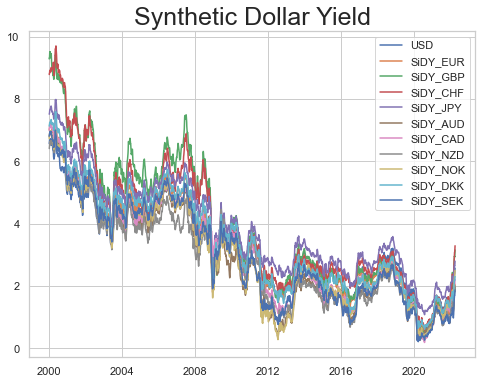

In [20]:
#Plotting Synthetic Dollar Yields (Fig-1b)

plt.figure(figsize=(8,6))

for each_curr in df_SiDY.iloc[:,1:]:
    plt.plot(df_SiDY['Date'], df_SiDY[each_curr], label=each_curr)

plt.title("Synthetic Dollar Yield", fontsize=25)
plt.legend()
plt.show()

### Average US Treasury Premium

- U.S. Treasury Premium, **Avg_US_Treasury_Prem(i,n,t)**, measures the difference in borrowing costs between foreign governments and the U.S. Treasury.
- Assumptions:
    - Government Bonds are default-free
    - FX swap markets are frictionless
    - Synthetic dollar yields of foreign Treasuries can be higher than the US Treasury yield if and only if the convienance yield of the US Treasury bond is higher than that of the foreign government bond

In [21]:
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-11,6.574286,7.021242,9.289249,8.789474,7.516214,6.786429,6.988571,6.414286,6.729286,7.135471,6.812143
1,2000-01-12,6.588571,7.038385,9.312106,8.805188,7.523357,6.801429,7.007143,6.415714,6.746429,7.154757,6.825000
2,2000-01-13,6.618571,7.055171,9.321392,8.820188,7.541871,6.816429,7.045000,6.428571,6.768571,7.173328,6.839286
3,2000-01-14,6.630000,7.059814,9.317106,8.818760,7.548600,6.830714,7.059286,6.455000,6.783571,7.179757,6.847857
4,2000-01-17,6.658571,7.079456,9.332821,8.824474,7.560743,6.845714,7.077857,6.478571,6.806429,7.193328,6.872857
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,2.414929,1.933407,2.945754,3.107171,2.647914,1.829694,2.065543,1.886603,2.326843,2.192729,1.708114
5801,2022-04-06,2.436700,1.941636,2.974911,3.132571,2.665586,1.832469,2.081143,1.892903,2.348250,2.201757,1.726400
5802,2022-04-07,2.473300,1.967764,3.018111,3.167557,2.703029,1.848947,2.112143,1.914296,2.386879,2.230114,1.768164
5803,2022-04-08,2.525043,2.005364,3.079539,3.216114,2.750186,1.890026,2.158129,1.950531,2.440964,2.269500,1.823779


In [22]:
Avg_US_Treasury_Prem = df_SiDY.copy()

Avg_US_Treasury_Prem['AUD'] = Avg_US_Treasury_Prem['SiDY_AUD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['CAD'] = Avg_US_Treasury_Prem['SiDY_CAD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['CHF'] = Avg_US_Treasury_Prem['SiDY_CHF'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['DKK'] = Avg_US_Treasury_Prem['SiDY_DKK'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['EUR'] = Avg_US_Treasury_Prem['SiDY_EUR'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['GBP'] = Avg_US_Treasury_Prem['SiDY_GBP'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['JPY'] = Avg_US_Treasury_Prem['SiDY_JPY'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['NOK'] = Avg_US_Treasury_Prem['SiDY_NOK'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['NZD'] = Avg_US_Treasury_Prem['SiDY_NZD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['SEK'] = Avg_US_Treasury_Prem['SiDY_SEK'] - Avg_US_Treasury_Prem['USD']

#Keep the relevant columns

Avg_US_Treasury_Prem = Avg_US_Treasury_Prem[['Date', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK']]
Avg_US_Treasury_Prem

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,SEK
0,2000-01-11,0.212143,0.414286,2.215188,0.561185,0.446956,2.714964,0.941929,0.155000,-0.160000,0.237857
1,2000-01-12,0.212857,0.418571,2.216617,0.566185,0.449814,2.723535,0.934786,0.157857,-0.172857,0.236429
2,2000-01-13,0.197857,0.426429,2.201617,0.554757,0.436599,2.702821,0.923300,0.150000,-0.190000,0.220714
3,2000-01-14,0.200714,0.429286,2.188760,0.549757,0.429814,2.687106,0.918600,0.153571,-0.175000,0.217857
4,2000-01-17,0.187143,0.419286,2.165903,0.534757,0.420885,2.674249,0.902171,0.147857,-0.180000,0.214286
...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,-0.585235,-0.349386,0.692243,-0.222200,-0.481521,0.530825,0.232986,-0.088086,-0.528326,-0.706814
5801,2022-04-06,-0.604231,-0.355557,0.695871,-0.234943,-0.495064,0.538211,0.228886,-0.088450,-0.543797,-0.710300
5802,2022-04-07,-0.624353,-0.361157,0.694257,-0.243186,-0.505536,0.544811,0.229729,-0.086421,-0.559004,-0.705136
5803,2022-04-08,-0.635017,-0.366914,0.691071,-0.255543,-0.519679,0.554496,0.225143,-0.084079,-0.574511,-0.701264


In [23]:
Avg_US_Treasury_Prem['Mean_10Y_US_Treasury_Prem'] = Avg_US_Treasury_Prem.set_index('Date').mean(axis=1).reset_index()[0]
Avg_US_Treasury_Prem

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,SEK,Mean_10Y_US_Treasury_Prem
0,2000-01-11,0.212143,0.414286,2.215188,0.561185,0.446956,2.714964,0.941929,0.155000,-0.160000,0.237857,0.773951
1,2000-01-12,0.212857,0.418571,2.216617,0.566185,0.449814,2.723535,0.934786,0.157857,-0.172857,0.236429,0.774379
2,2000-01-13,0.197857,0.426429,2.201617,0.554757,0.436599,2.702821,0.923300,0.150000,-0.190000,0.220714,0.762409
3,2000-01-14,0.200714,0.429286,2.188760,0.549757,0.429814,2.687106,0.918600,0.153571,-0.175000,0.217857,0.760046
4,2000-01-17,0.187143,0.419286,2.165903,0.534757,0.420885,2.674249,0.902171,0.147857,-0.180000,0.214286,0.748654
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,-0.585235,-0.349386,0.692243,-0.222200,-0.481521,0.530825,0.232986,-0.088086,-0.528326,-0.706814,-0.150551
5801,2022-04-06,-0.604231,-0.355557,0.695871,-0.234943,-0.495064,0.538211,0.228886,-0.088450,-0.543797,-0.710300,-0.156937
5802,2022-04-07,-0.624353,-0.361157,0.694257,-0.243186,-0.505536,0.544811,0.229729,-0.086421,-0.559004,-0.705136,-0.161600
5803,2022-04-08,-0.635017,-0.366914,0.691071,-0.255543,-0.519679,0.554496,0.225143,-0.084079,-0.574511,-0.701264,-0.166630


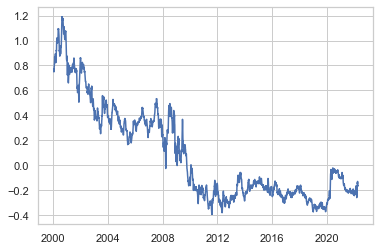

In [24]:
plt.plot(Avg_US_Treasury_Prem['Date'], Avg_US_Treasury_Prem['Mean_10Y_US_Treasury_Prem'])

#### Computations for two adjusted versions of the U.S. Treasury Premium:
1. Premium adjusted for Swap market frictions
    - (a.k.a.) Premium, adj. LIBOR CIP dev.
    - Tau_Libor(i,n,t) = { IRS(i,n,t) - IRS(USD,n,t) } - MiFP(i,n,t)
    - In benchmark calculation, we use the Libor interest rate swap as our risk-free rate proxy.
2. Premium adjusted for both Swap market frictions and the credit differential between foreign and US Treasuries
    - (a.k.a.) Premium, adj. LIBOR CIP dev & CDS

##### 1. Premium, adj. LIBOR CIP dev.

   _**Equation-1:**_ Tau_Libor(i,n,t) = { IRS(i,n,t) - IRS(USD,n,t) } - MiFP(i,n,t)

   _**Equation-2:**_ Adjusted_Swap_Avg_US_Treasury_Prem(i,n,t) = Avg_US_Treasury_Prem(i,n,t) - Tau_Libor(i,n,t)

In [25]:
# First merge the IRS and MiFP datasets

df_Adjusted_Swap_Avg_US_Treasury_Prem = df_Int_Rate_Swap_10Y.merge(df_MiFP, left_on='Date', right_on='Date', how='outer')
df_Adjusted_Swap_Avg_US_Treasury_Prem

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,...,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2000-01-03,7.3600,5.8550,3.745000,2.4770,2.0200,7.6400,6.6850,8.1350,6.8450,...,-1.573385,-3.598535,-5.144474,-5.7130,0.34500,-0.5950,0.86500,-0.5450,-1.355471,-0.94000
1,2000-01-04,7.2850,5.8650,3.745000,2.4770,2.1100,7.5500,6.7450,8.1350,6.9150,...,-1.488385,-3.523535,-5.069474,-5.5480,0.33000,-0.4600,0.94000,-0.4000,-1.285471,-0.84000
2,2000-01-05,7.3700,5.8550,3.745000,2.4770,2.0625,7.5800,6.7850,8.2600,6.8900,...,-1.583385,-3.608535,-5.154474,-5.6805,0.27500,-0.5050,0.98000,-0.5100,-1.375471,-0.90000
3,2000-01-06,7.3200,5.9150,3.745000,2.4770,2.0300,7.5600,6.7150,8.2500,6.9350,...,-1.473385,-3.558535,-5.104474,-5.6630,0.30500,-0.5250,1.02000,-0.4150,-1.265471,-0.82500
4,2000-01-07,7.2700,5.8950,3.745000,2.4770,2.0850,7.5900,6.6950,8.2900,6.9150,...,-1.443385,-3.508535,-5.054474,-5.5580,0.38500,-0.4950,1.11000,-0.3750,-1.275471,-0.82500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.5918,1.2560,1.134925,0.1675,0.3633,3.1975,2.9991,3.5575,2.8167,...,-1.437050,-1.450625,-2.606800,-2.5585,0.99070,0.3498,1.38320,0.1874,-1.401800,-0.59380
5807,2022-04-06,2.6428,1.3030,1.134925,0.1675,0.4036,3.2125,2.9990,3.6050,2.8884,...,-1.441050,-1.501625,-2.657800,-2.5692,0.95845,0.2987,1.38095,0.2056,-1.420800,-0.56780
5808,2022-04-07,2.6971,1.3274,1.134925,0.1675,0.3961,3.2675,3.0517,3.6250,2.9050,...,-1.470950,-1.555925,-2.712100,-2.6310,0.95915,0.2971,1.34915,0.1654,-1.454000,-0.60335
5809,2022-04-08,2.7580,1.3809,1.134925,0.1675,0.4049,3.2830,3.1120,3.6700,2.9150,...,-1.478350,-1.616825,-2.773000,-2.6831,0.91380,0.2965,1.34700,0.1045,-1.463000,-0.64050


In [26]:
# Calculating Tau Libor (this is equal to negative of Basis Swap Rate)

df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_EUR'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_EUR'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_EUR']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_GBP'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_GBP'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_GBP']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_CHF'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_CHF'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_CHF']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_JPY'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_JPY'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_JPY']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_AUD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_AUD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_AUD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_CAD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_CAD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_CAD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_NZD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_NZD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_NZD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_NOK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_NOK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_NOK']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_DKK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_DKK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_DKK']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_SEK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_SEK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_SEK']

# Keeping only the relevant columns

df_Adjusted_Swap_Avg_US_Treasury_Prem = df_Adjusted_Swap_Avg_US_Treasury_Prem[['Date', 'Tau_LIBOR_EUR', 'Tau_LIBOR_GBP',
                                                                               'Tau_LIBOR_CHF', 'Tau_LIBOR_JPY',
                                                                               'Tau_LIBOR_AUD', 'Tau_LIBOR_CAD',
                                                                               'Tau_LIBOR_NZD', 'Tau_LIBOR_NOK',
                                                                               'Tau_LIBOR_DKK', 'Tau_LIBOR_SEK'
                                                                              ]]
df_Adjusted_Swap_Avg_US_Treasury_Prem

,Date,Tau_LIBOR_EUR,Tau_LIBOR_GBP,Tau_LIBOR_CHF,Tau_LIBOR_JPY,Tau_LIBOR_AUD,Tau_LIBOR_CAD,Tau_LIBOR_NZD,Tau_LIBOR_NOK,Tau_LIBOR_DKK,Tau_LIBOR_SEK
0,2000-01-03,0.068385,-0.016465,0.261474,0.373,-0.06500,-0.0800,-0.09000,0.0300,0.215471,0.04000
1,2000-01-04,0.068385,-0.016465,0.261474,0.373,-0.06500,-0.0800,-0.09000,0.0300,0.215471,0.04000
2,2000-01-05,0.068385,-0.016465,0.261474,0.373,-0.06500,-0.0800,-0.09000,0.0300,0.215471,0.04000
3,2000-01-06,0.068385,-0.016465,0.261474,0.373,-0.06500,-0.0800,-0.09000,0.0300,0.215471,0.04000
4,2000-01-07,0.068385,-0.016465,0.261474,0.373,-0.06500,-0.0800,-0.09000,0.0200,0.215471,0.04000
...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,0.101250,-0.006250,0.182500,0.330,-0.38500,0.0575,-0.41750,0.0375,0.348500,-0.04500
5807,2022-04-06,0.101250,-0.006250,0.182500,0.330,-0.38875,0.0575,-0.41875,0.0400,0.348500,-0.04500
5808,2022-04-07,0.101250,-0.006250,0.182500,0.330,-0.38875,0.0575,-0.42125,0.0425,0.348500,-0.04375
5809,2022-04-08,0.101250,-0.006250,0.182500,0.330,-0.38880,0.0575,-0.43500,0.0525,0.348500,-0.02750


In [27]:
# To compute adjusted LIBOR CIP dev. Premium, we first merge the Tau Libor data with previously computed Premium data

df_US_Treasury_Premiums = Avg_US_Treasury_Prem.iloc[:,:-1].merge(df_Adjusted_Swap_Avg_US_Treasury_Prem, left_on='Date', right_on='Date', how='outer')
df_US_Treasury_Premiums

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Tau_LIBOR_EUR,Tau_LIBOR_GBP,Tau_LIBOR_CHF,Tau_LIBOR_JPY,Tau_LIBOR_AUD,Tau_LIBOR_CAD,Tau_LIBOR_NZD,Tau_LIBOR_NOK,Tau_LIBOR_DKK,Tau_LIBOR_SEK
0,2000-01-11,0.212143,0.414286,2.215188,0.561185,0.446956,2.714964,0.941929,0.155000,-0.160000,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.02,0.215471,0.04
1,2000-01-12,0.212857,0.418571,2.216617,0.566185,0.449814,2.723535,0.934786,0.157857,-0.172857,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.02,0.215471,0.04
2,2000-01-13,0.197857,0.426429,2.201617,0.554757,0.436599,2.702821,0.923300,0.150000,-0.190000,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.02,0.215471,0.04
3,2000-01-14,0.200714,0.429286,2.188760,0.549757,0.429814,2.687106,0.918600,0.153571,-0.175000,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.02,0.215471,0.04
4,2000-01-17,0.187143,0.419286,2.165903,0.534757,0.420885,2.674249,0.902171,0.147857,-0.180000,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.02,0.215471,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.03,0.215471,0.04
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.03,0.215471,0.04
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.03,0.215471,0.04
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.068385,-0.016465,0.261474,0.373,-0.065,-0.08,-0.09,0.02,0.215471,0.04


In [28]:
# Computing the adj. LIBOR CIP dev.

df_US_Treasury_Premiums['Adj_Tau_AUD'] = df_US_Treasury_Premiums['AUD'] - df_US_Treasury_Premiums['Tau_LIBOR_AUD']
df_US_Treasury_Premiums['Adj_Tau_CAD'] = df_US_Treasury_Premiums['CAD'] - df_US_Treasury_Premiums['Tau_LIBOR_CAD']
df_US_Treasury_Premiums['Adj_Tau_CHF'] = df_US_Treasury_Premiums['CHF'] - df_US_Treasury_Premiums['Tau_LIBOR_CHF']
df_US_Treasury_Premiums['Adj_Tau_DKK'] = df_US_Treasury_Premiums['DKK'] - df_US_Treasury_Premiums['Tau_LIBOR_DKK']
df_US_Treasury_Premiums['Adj_Tau_EUR'] = df_US_Treasury_Premiums['EUR'] - df_US_Treasury_Premiums['Tau_LIBOR_EUR']
df_US_Treasury_Premiums['Adj_Tau_GBP'] = df_US_Treasury_Premiums['GBP'] - df_US_Treasury_Premiums['Tau_LIBOR_GBP']
df_US_Treasury_Premiums['Adj_Tau_JPY'] = df_US_Treasury_Premiums['JPY'] - df_US_Treasury_Premiums['Tau_LIBOR_JPY']
df_US_Treasury_Premiums['Adj_Tau_NOK'] = df_US_Treasury_Premiums['NOK'] - df_US_Treasury_Premiums['Tau_LIBOR_NOK']
df_US_Treasury_Premiums['Adj_Tau_NZD'] = df_US_Treasury_Premiums['NZD'] - df_US_Treasury_Premiums['Tau_LIBOR_NZD']
df_US_Treasury_Premiums['Adj_Tau_SEK'] = df_US_Treasury_Premiums['SEK'] - df_US_Treasury_Premiums['Tau_LIBOR_SEK']

df_US_Treasury_Premiums = df_US_Treasury_Premiums[['Date','AUD','CAD','CHF','DKK','EUR','GBP','JPY','NOK','NZD','SEK',
                         'Adj_Tau_AUD','Adj_Tau_CAD','Adj_Tau_CHF','Adj_Tau_DKK','Adj_Tau_EUR','Adj_Tau_GBP',
                         'Adj_Tau_JPY','Adj_Tau_NOK','Adj_Tau_NZD','Adj_Tau_SEK']]
df_US_Treasury_Premiums

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_AUD,Adj_Tau_CAD,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK
0,2000-01-11,0.212143,0.414286,2.215188,0.561185,0.446956,2.714964,0.941929,0.155000,-0.160000,...,0.277143,0.494286,1.953714,0.345714,0.378571,2.731429,0.568929,0.135000,-0.070000,0.197857
1,2000-01-12,0.212857,0.418571,2.216617,0.566185,0.449814,2.723535,0.934786,0.157857,-0.172857,...,0.277857,0.498571,1.955143,0.350714,0.381429,2.740000,0.561786,0.137857,-0.082857,0.196429
2,2000-01-13,0.197857,0.426429,2.201617,0.554757,0.436599,2.702821,0.923300,0.150000,-0.190000,...,0.262857,0.506429,1.940143,0.339286,0.368214,2.719286,0.550300,0.130000,-0.100000,0.180714
3,2000-01-14,0.200714,0.429286,2.188760,0.549757,0.429814,2.687106,0.918600,0.153571,-0.175000,...,0.265714,0.509286,1.927286,0.334286,0.361429,2.703571,0.545600,0.133571,-0.085000,0.177857
4,2000-01-17,0.187143,0.419286,2.165903,0.534757,0.420885,2.674249,0.902171,0.147857,-0.180000,...,0.252143,0.499286,1.904429,0.319286,0.352500,2.690714,0.529171,0.127857,-0.090000,0.174286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2. Premium, adj. LIBOR CIP dev & CDS

### Cross-Country Mean of the 5-year U.S. Treasury Premium

- Observation-1: The difference between these measures are smallest from 2000 to 2006
- Observation-2: During that time, CIP held for interbank rates and sovereign CDS spreads between U.S. and foreign countries were approximately zero. Therefore, the U.S. Treasury Premium and the adjusted versions, CIP and CIP & CDS, were all nearly equal with cross-country averages at the five-year tenor.

In [29]:
df_US_Treasury_Premiums['CC_Mean'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,:10].mean(axis=1).reset_index()[0]
df_US_Treasury_Premiums['CC_Mean_Adj_CIP'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,10:-1].mean(axis=1).reset_index()[0]
df_US_Treasury_Premiums

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_31616/405675209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['CC_Mean'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,:10].mean(axis=1).reset_index()[0]
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_31616/405675209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['CC_Mean_Adj_CIP'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,10:-1].mean(axis=1).reset_index()[0]


,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK,CC_Mean,CC_Mean_Adj_CIP
0,2000-01-11,0.212143,0.414286,2.215188,0.561185,0.446956,2.714964,0.941929,0.155000,-0.160000,...,1.953714,0.345714,0.378571,2.731429,0.568929,0.135000,-0.070000,0.197857,0.773951,0.701264
1,2000-01-12,0.212857,0.418571,2.216617,0.566185,0.449814,2.723535,0.934786,0.157857,-0.172857,...,1.955143,0.350714,0.381429,2.740000,0.561786,0.137857,-0.082857,0.196429,0.774379,0.701693
2,2000-01-13,0.197857,0.426429,2.201617,0.554757,0.436599,2.702821,0.923300,0.150000,-0.190000,...,1.940143,0.339286,0.368214,2.719286,0.550300,0.130000,-0.100000,0.180714,0.762409,0.689723
3,2000-01-14,0.200714,0.429286,2.188760,0.549757,0.429814,2.687106,0.918600,0.153571,-0.175000,...,1.927286,0.334286,0.361429,2.703571,0.545600,0.133571,-0.085000,0.177857,0.760046,0.687360
4,2000-01-17,0.187143,0.419286,2.165903,0.534757,0.420885,2.674249,0.902171,0.147857,-0.180000,...,1.904429,0.319286,0.352500,2.690714,0.529171,0.127857,-0.090000,0.174286,0.748654,0.675967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


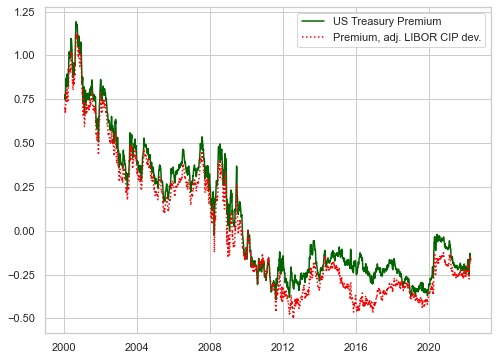

In [30]:
'''
Figure-2 of the paper - Not exactly same as we do not know how the author aggregated the different countries' Premiums into
a single value. But the observation of the author and the results our (assumed) methodology generates are approx. same.
'''

plt.figure(figsize=(8,6))
plt.plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CC_Mean'], label='US Treasury Premium', color='darkgreen')
plt.plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CC_Mean_Adj_CIP'], label='Premium, adj. LIBOR CIP dev.', linestyle=':', color='red')
plt.legend()
plt.show()

### 5-year average U.S. Treasury Premium by country

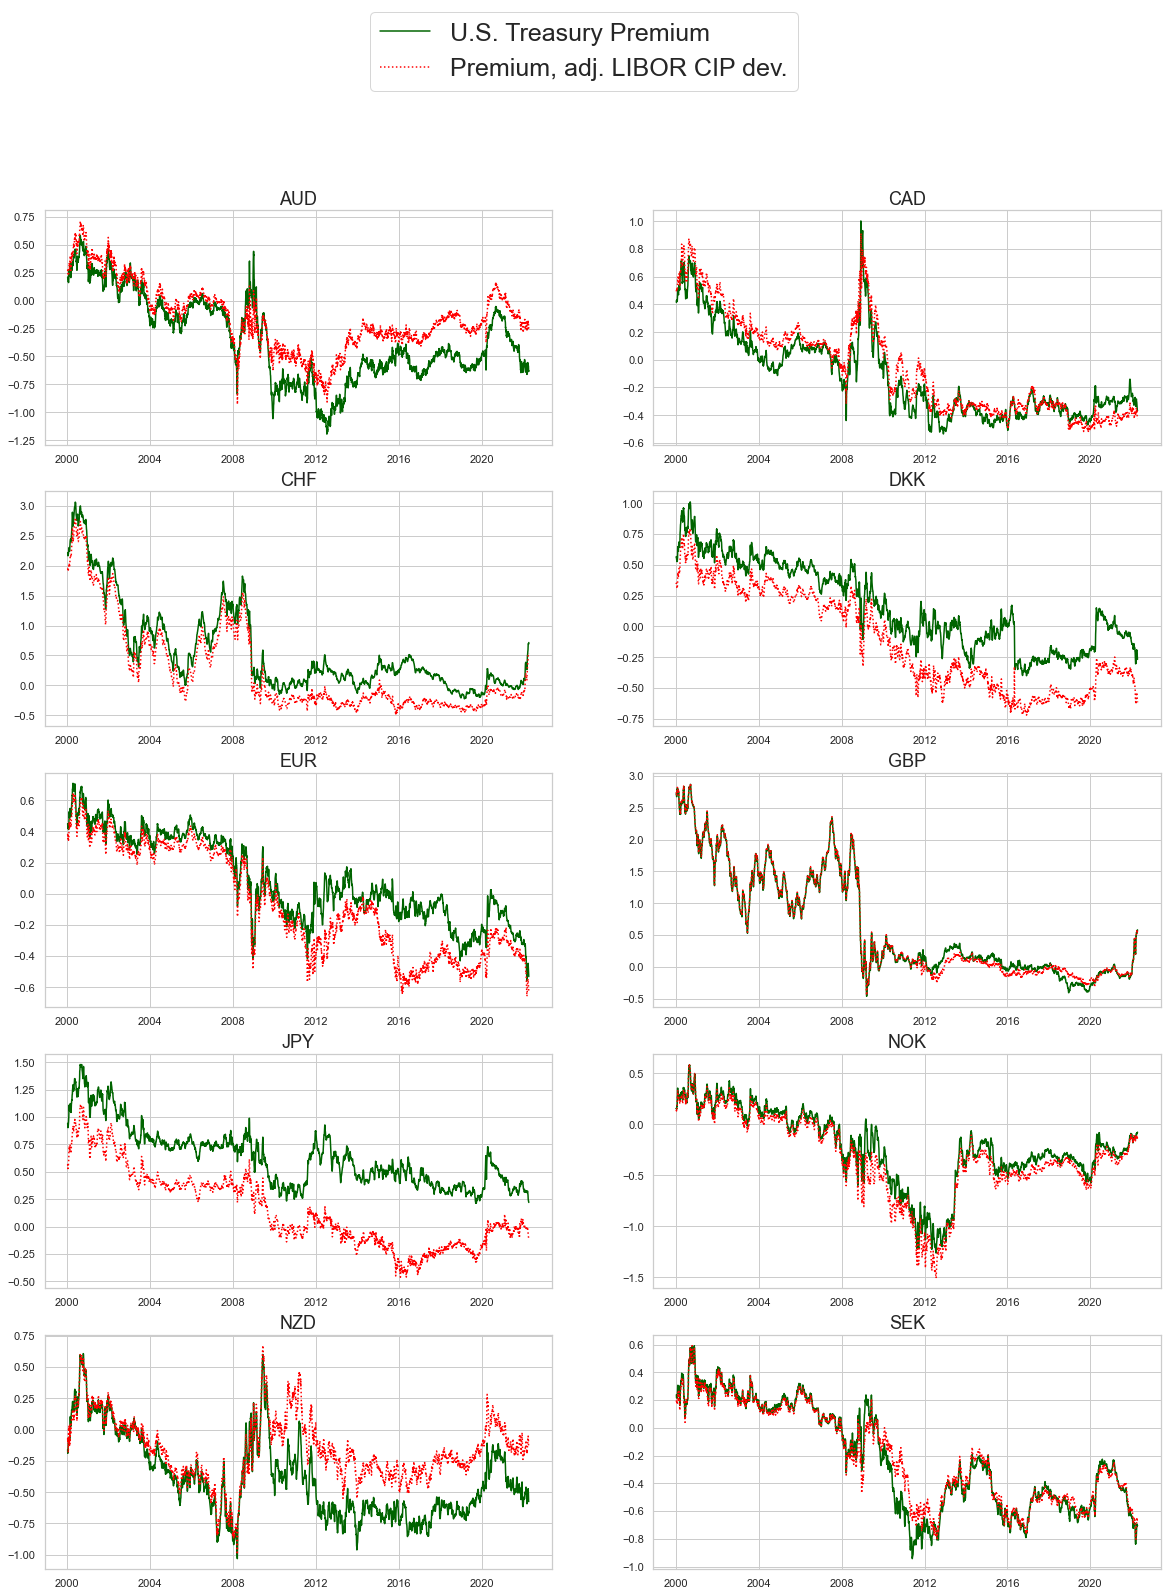

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,25))

axes[0][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['AUD'], color='darkgreen')
axes[0][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_AUD'], linestyle=':', color='red')
axes[0][0].set_title('AUD', fontsize=18)

axes[0][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CAD'], color='darkgreen')
axes[0][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_CAD'], linestyle=':', color='red')
axes[0][1].set_title('CAD', fontsize=18)

axes[1][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CHF'], color='darkgreen')
axes[1][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_CHF'], linestyle=':', color='red')
axes[1][0].set_title('CHF', fontsize=18)

axes[1][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['DKK'], color='darkgreen')
axes[1][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_DKK'], linestyle=':', color='red')
axes[1][1].set_title('DKK', fontsize=18)

axes[2][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['EUR'], color='darkgreen')
axes[2][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_EUR'], linestyle=':', color='red')
axes[2][0].set_title('EUR', fontsize=18)

axes[2][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['GBP'], color='darkgreen')
axes[2][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_GBP'], linestyle=':', color='red')
axes[2][1].set_title('GBP', fontsize=18)

axes[3][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['JPY'], color='darkgreen')
axes[3][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_JPY'], linestyle=':', color='red')
axes[3][0].set_title('JPY', fontsize=18)

axes[3][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['NOK'], color='darkgreen')
axes[3][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_NOK'], linestyle=':', color='red')
axes[3][1].set_title('NOK', fontsize=18)

axes[4][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['NZD'], color='darkgreen')
axes[4][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_NZD'], linestyle=':', color='red')
axes[4][0].set_title('NZD', fontsize=18)

axes[4][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['SEK'], color='darkgreen')
axes[4][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_SEK'], linestyle=':', color='red')
axes[4][1].set_title('SEK', fontsize=18)

fig.legend(['U.S. Treasury Premium', 'Premium, adj. LIBOR CIP dev.'], loc='upper center', fontsize=25)

In [32]:
df_US_Treasury_Premiums.iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'Full Sample'})

,Full Sample
mean,0.116389
sem,0.005624
count,5805.000000


In [33]:
from functools import reduce

df_stats_full = df_US_Treasury_Premiums.iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'Full Sample'})
df_stats_2006 = df_US_Treasury_Premiums[df_US_Treasury_Premiums['Date']<='2006-12-31'].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2000-2006'})
df_stats_2009 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2006-12-31') & (df_US_Treasury_Premiums['Date']<='2009-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2007-2009'})
df_stats_2016 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2009-12-31') & (df_US_Treasury_Premiums['Date']<='2016-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2010-2016'})
df_stats_2021 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2016-12-31') & (df_US_Treasury_Premiums['Date']<='2021-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2017-2021'})

dfs_ss = [df_stats_full, df_stats_2006, df_stats_2009, df_stats_2016, df_stats_2021]

df_summary_stats = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_ss)
df_summary_stats

,Full Sample,2000-2006,2007-2009,2010-2016,2017-2021
mean,0.116389,0.573127,0.266613,-0.173554,-0.191068
sem,0.005624,0.006790,0.011465,0.003720,0.003345
count,5805.000000,1819.000000,784.000000,1826.000000,1305.000000


In [34]:
df_US_Treasury_Premiums.drop(columns=['CC_Mean','CC_Mean_Adj_CIP'], inplace=True)

df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,1:11].mean(axis=1)
df_US_Treasury_Premiums['Avg_Adj_Tau_Premium'] = df_US_Treasury_Premiums.iloc[:,11:-1].mean(axis=1)
df_US_Treasury_Premiums

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_31616/180969697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,1:11].mean(axis=1)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_31616/180969697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK,Avg_Premium,Avg_Adj_Tau_Premium
0,2000-01-11,0.212143,0.414286,2.215188,0.561185,0.446956,2.714964,0.941929,0.155000,-0.160000,...,1.953714,0.345714,0.378571,2.731429,0.568929,0.135000,-0.070000,0.197857,0.773951,0.701264
1,2000-01-12,0.212857,0.418571,2.216617,0.566185,0.449814,2.723535,0.934786,0.157857,-0.172857,...,1.955143,0.350714,0.381429,2.740000,0.561786,0.137857,-0.082857,0.196429,0.774379,0.701693
2,2000-01-13,0.197857,0.426429,2.201617,0.554757,0.436599,2.702821,0.923300,0.150000,-0.190000,...,1.940143,0.339286,0.368214,2.719286,0.550300,0.130000,-0.100000,0.180714,0.762409,0.689723
3,2000-01-14,0.200714,0.429286,2.188760,0.549757,0.429814,2.687106,0.918600,0.153571,-0.175000,...,1.927286,0.334286,0.361429,2.703571,0.545600,0.133571,-0.085000,0.177857,0.760046,0.687360
4,2000-01-17,0.187143,0.419286,2.165903,0.534757,0.420885,2.674249,0.902171,0.147857,-0.180000,...,1.904429,0.319286,0.352500,2.690714,0.529171,0.127857,-0.090000,0.174286,0.748654,0.675967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_Premium_Avg = df_US_Treasury_Premiums.loc[:,['Date','Avg_Premium','Avg_Adj_Tau_Premium']].set_index('Date').dropna().rolling(7).mean().dropna().reset_index()
df_Premium_Avg

,Date,Avg_Premium,Avg_Adj_Tau_Premium
0,2000-01-19,0.762611,0.689924
1,2000-01-20,0.761512,0.688825
2,2000-01-21,0.760846,0.685945
3,2000-01-24,0.763401,0.686286
4,2000-01-25,0.766152,0.686823
...,...,...,...
5794,2022-04-05,-0.137740,-0.157583
5795,2022-04-06,-0.140300,-0.160277
5796,2022-04-07,-0.144021,-0.164122
5797,2022-04-08,-0.149364,-0.169376


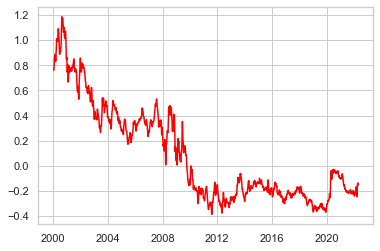

In [36]:
plt.plot(df_Premium_Avg['Date'],df_Premium_Avg['Avg_Premium'], color='red')

In [37]:
# Exporting the data from here to juxtapose against 5Y and 1Y

df_Premium_Avg.set_index('Date').to_csv('Output/Average_US_Tresury_Premium_10Y.csv')